# **Linking to Google Drive**

In [71]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading the Dataset**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
sc = pd.read_csv('/content/drive/MyDrive/Elevvo Pathways Tasks/Task 1: Student Score Prediction/StudentPerformanceFactors.csv')
sc.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **Data inspection**

In [74]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [75]:
sc.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [76]:
#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(sc)
#profile.to_file("student_scores.html")

# **Data Cleaning**

**Dropping Missing Values**

In [77]:
(sc.isnull().sum().sum() / (sc.shape[0] * sc.shape[1])) * 100

np.float64(0.1778416830634176)

In [78]:
sc = sc.dropna(axis=0).reset_index(drop=True)

**handling Outliers and Mistaken Data Entries**

In [79]:
sc = sc[sc.Exam_Score <= 100]

In [80]:
sc = sc[sc.Hours_Studied >= 5]

In [81]:
sc = sc[sc.Hours_Studied <= 40]

In [82]:
sc = sc[sc.Tutoring_Sessions <= 5.5]

In [83]:
sc = sc[sc.Physical_Activity <= 5.5]

In [84]:
sc = sc[sc.Physical_Activity >= 0.5]

In [85]:
sc = sc[sc.Exam_Score <= 78]

In [86]:
sc = sc[sc.Exam_Score >= 57]

In [87]:
sc = sc.reset_index(drop=True)

In [88]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6192 entries, 0 to 6191
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6192 non-null   int64 
 1   Attendance                  6192 non-null   int64 
 2   Parental_Involvement        6192 non-null   object
 3   Access_to_Resources         6192 non-null   object
 4   Extracurricular_Activities  6192 non-null   object
 5   Sleep_Hours                 6192 non-null   int64 
 6   Previous_Scores             6192 non-null   int64 
 7   Motivation_Level            6192 non-null   object
 8   Internet_Access             6192 non-null   object
 9   Tutoring_Sessions           6192 non-null   int64 
 10  Family_Income               6192 non-null   object
 11  Teacher_Quality             6192 non-null   object
 12  School_Type                 6192 non-null   object
 13  Peer_Influence              6192 non-null   obje

# **Numerical Data Visualization**

In [89]:
sc.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 0.999, 1], numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0.000,5.0,60.0,4.0,50.00,0.0,1.0,57.000
0.100,12.0,64.0,5.0,55.00,0.0,2.0,63.000
0.250,16.0,70.0,6.0,63.00,1.0,2.0,65.000
0.900,28.0,96.0,9.0,95.00,3.0,4.0,71.000
0.950,30.0,98.0,9.0,97.45,4.0,5.0,72.000
0.990,34.0,100.0,10.0,100.00,5.0,5.0,75.000
0.995,35.0,100.0,10.0,100.00,5.0,5.0,75.000
0.999,38.0,100.0,10.0,100.00,5.0,5.0,76.809
1.000,39.0,100.0,10.0,100.00,5.0,5.0,78.000


**Histograms**

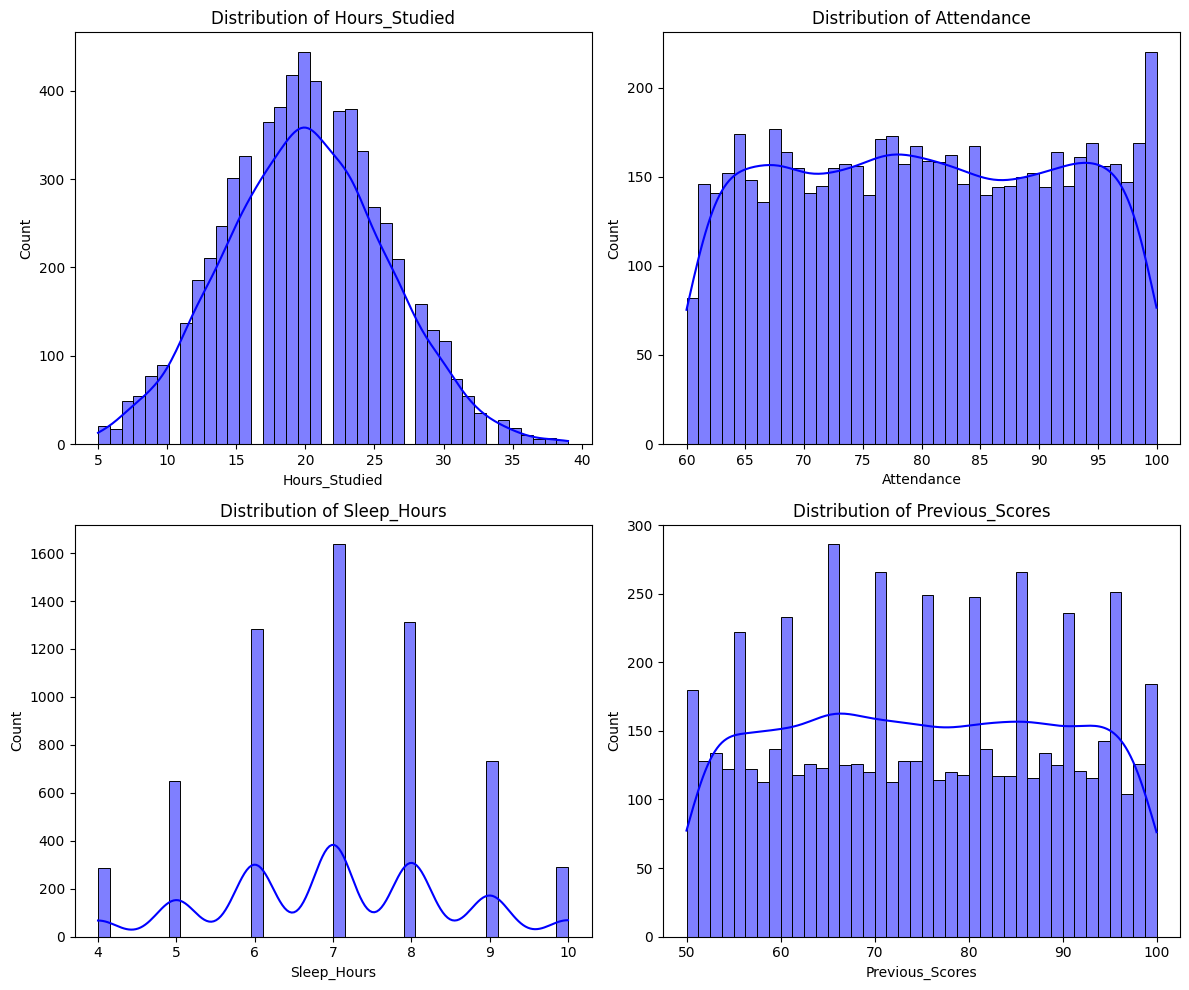

In [90]:
features=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(sc[col],bins=40,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

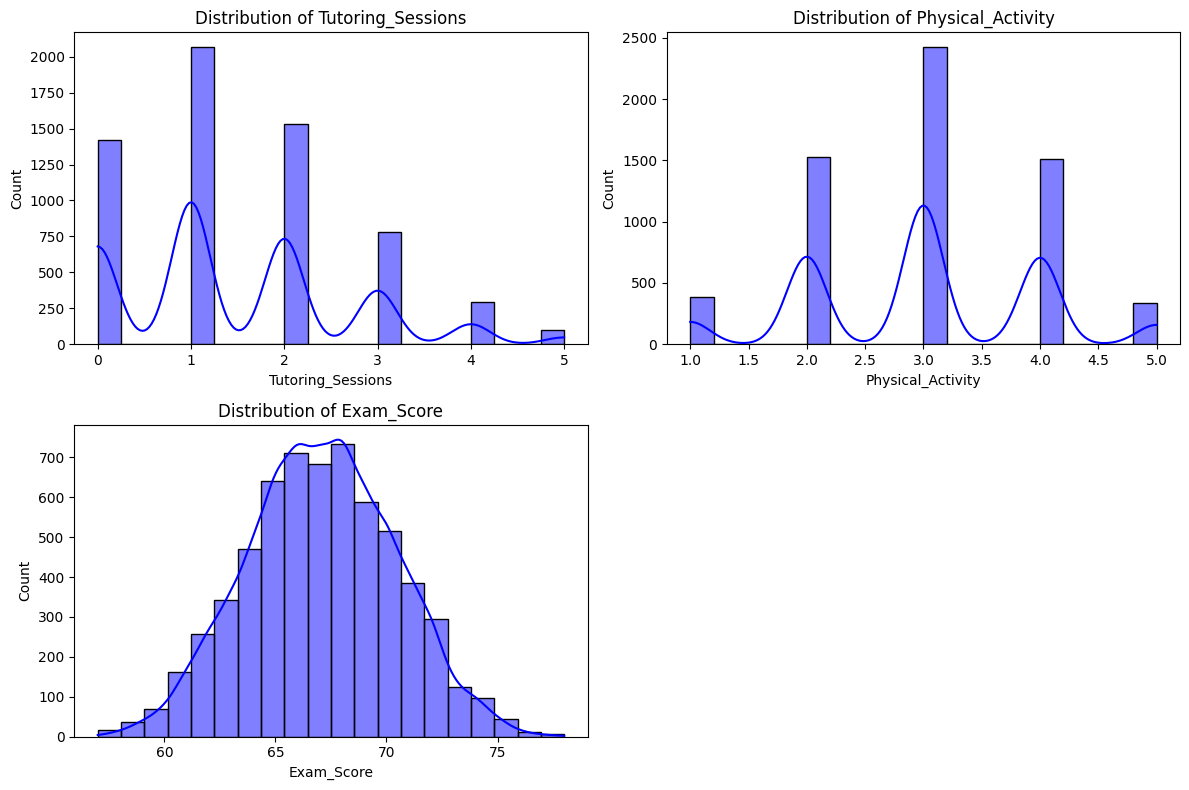

In [91]:
features=['Tutoring_Sessions','Physical_Activity','Exam_Score']
plt.figure(figsize=(12,8))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(sc[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Box Plots**

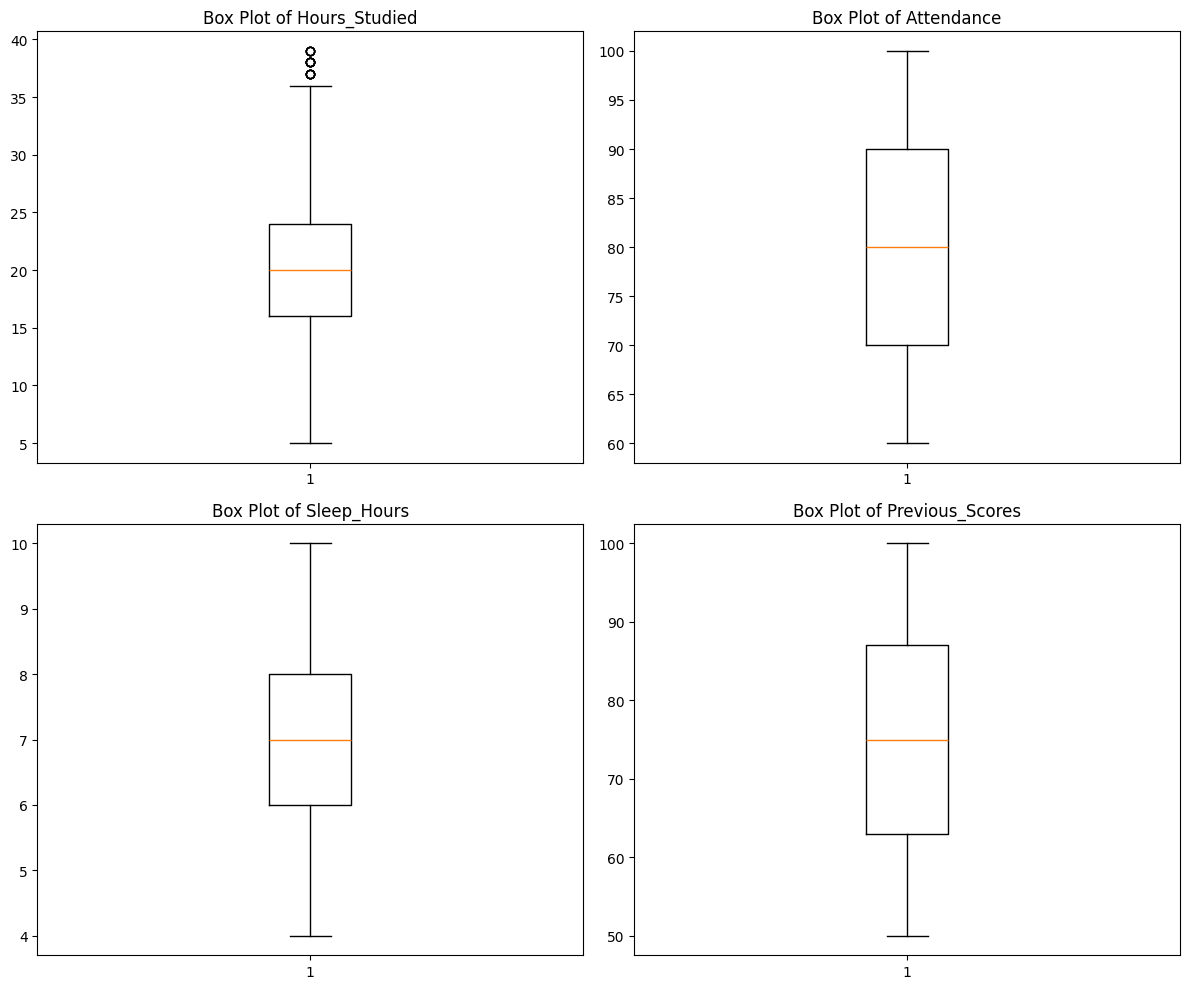

In [92]:
features=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(sc[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

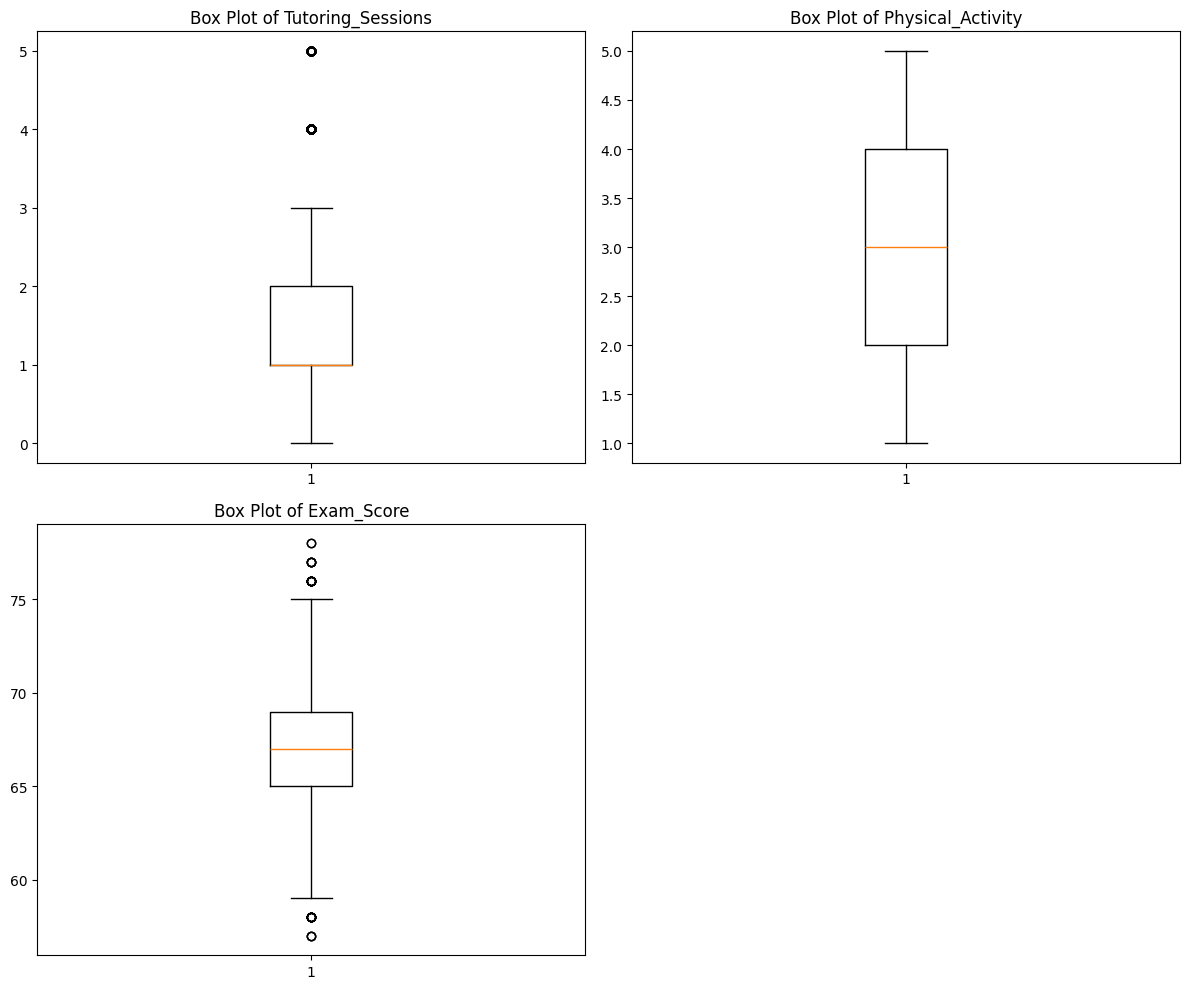

In [93]:
features=['Tutoring_Sessions','Physical_Activity','Exam_Score']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(sc[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

**Heatmap to Show Correlation**

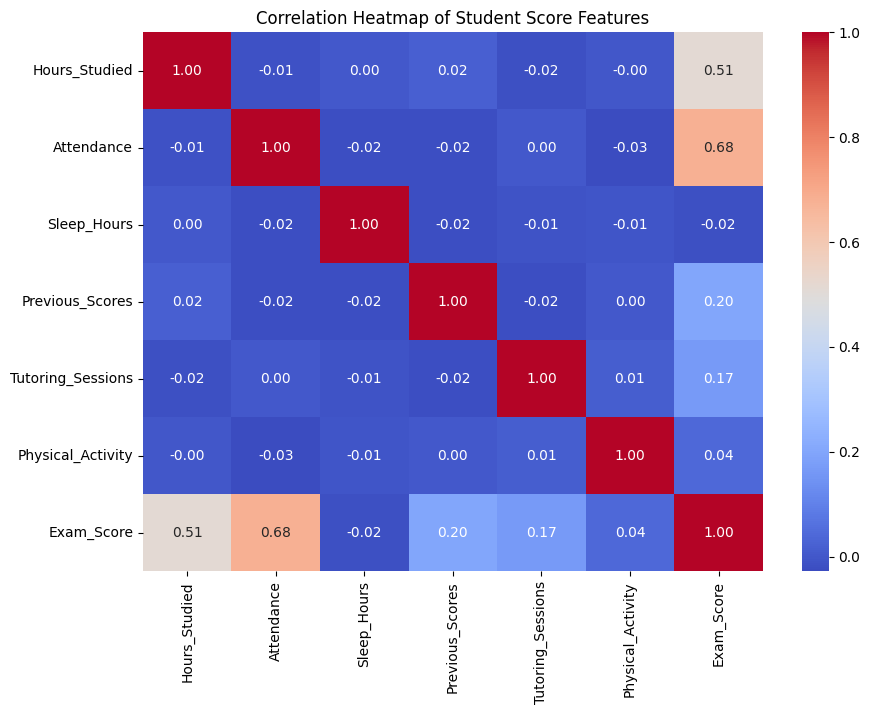

In [94]:
features = sc.select_dtypes(include=['number'])
plt.figure(figsize=(10,7))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Score Features")
plt.show()

# **Categorical Data Visualization**

**Count Plots**

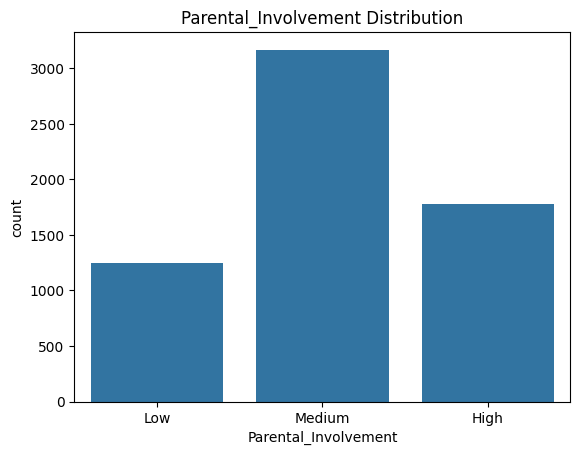

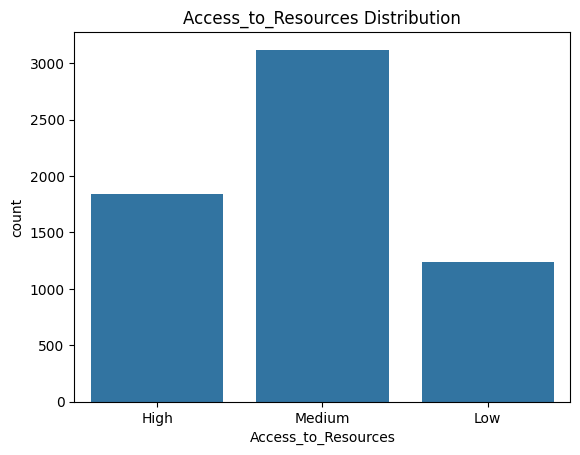

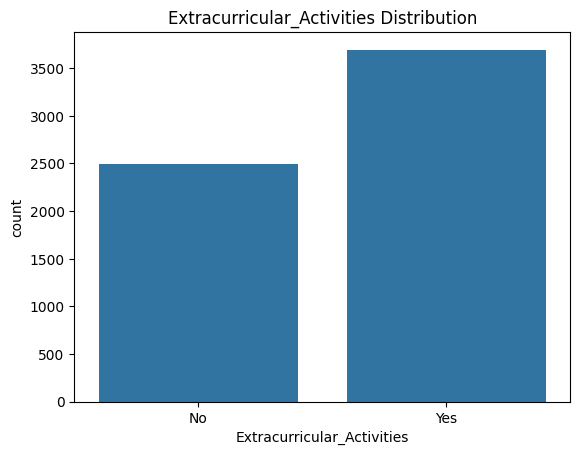

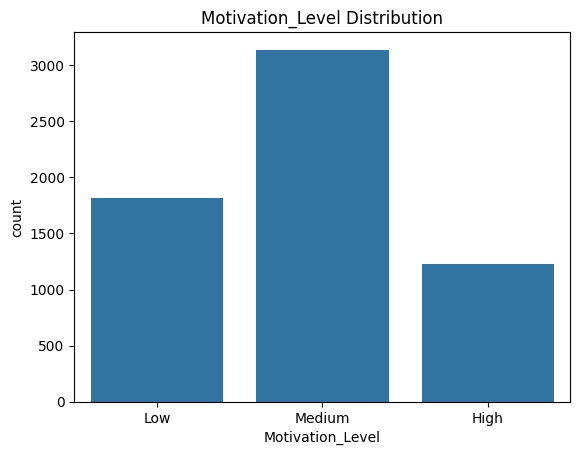

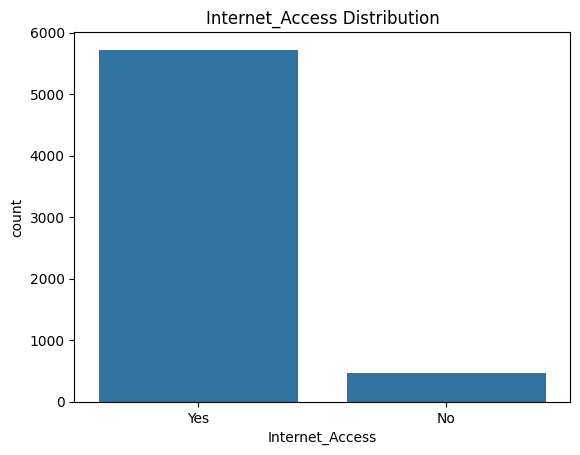

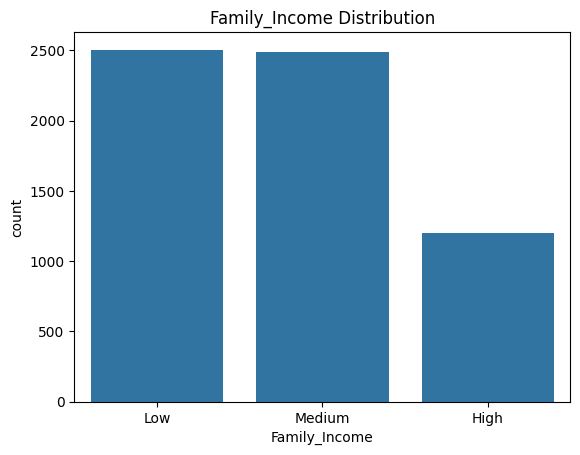

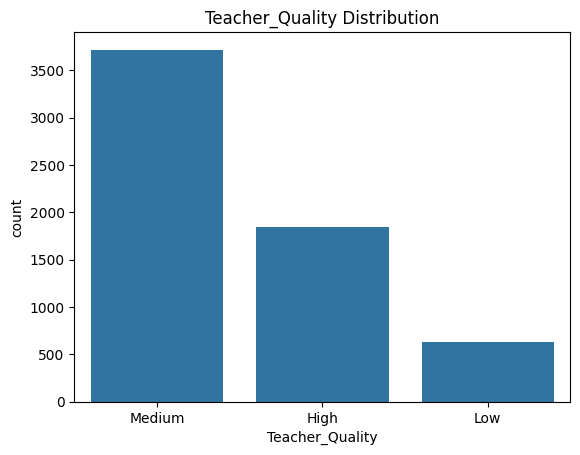

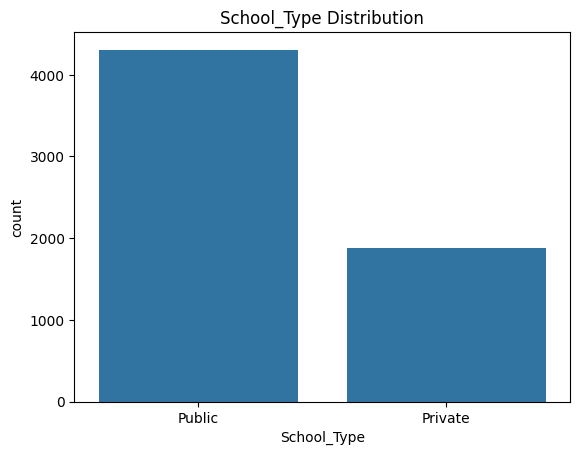

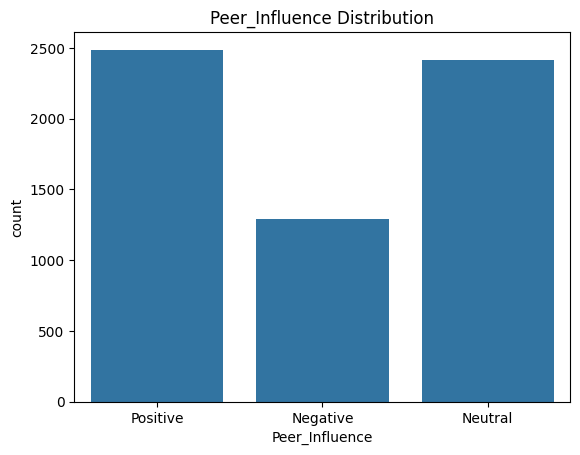

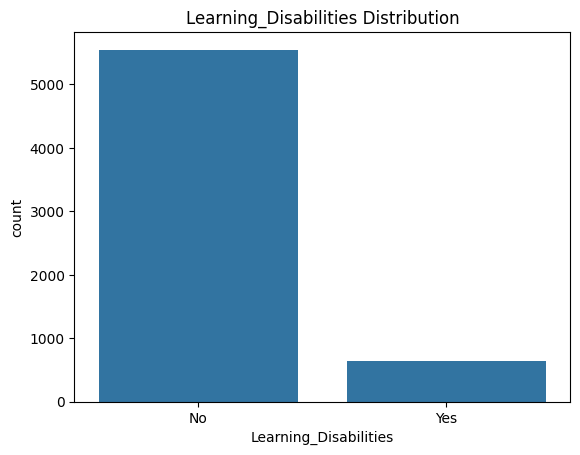

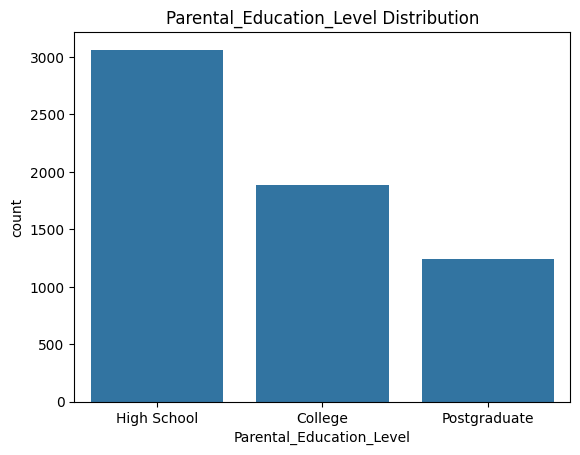

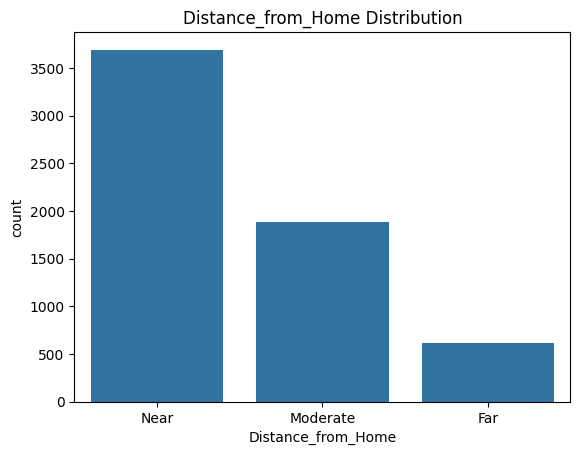

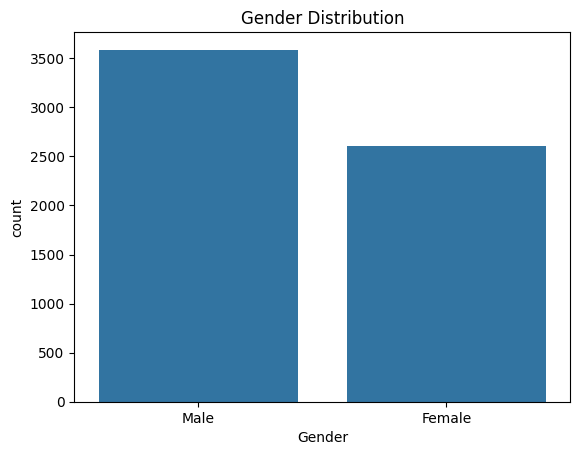

In [95]:
features=sc.select_dtypes(include=['object', 'category', 'boolean']).columns.tolist()
for feature in features:
  sns.countplot(x=feature, data=sc)
  plt.title(f"{feature} Distribution")
  plt.show()

# **Splitting Data**

In [96]:
X = sc.drop("Exam_Score", axis=1)
y = sc["Exam_Score"]
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (6192, 19)

Shape of y: (6192,)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category", "boolean"]).columns

# **Creating The Pipeline**

In [99]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))  # add degree-2 features
])

# full preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# transform train/test
X_train_final = preprocessor.fit_transform(X_train)
X_test_final  = preprocessor.transform(X_test)

print("Train final shape:", X_train_final.shape)
print("Test final shape:", X_test_final.shape)


Train final shape: (4953, 61)
Test final shape: (1239, 61)


In [100]:
# Check scaling of numeric features
X_train_num = preprocessor.named_transformers_["num"].transform(X_train[num_cols])

print("Means:", np.mean(X_train_num, axis=0))

print("Stds:", np.std(X_train_num, axis=0, ddof=0))

Means: [ 1.98368589e-16 -5.11738172e-16 -1.45534649e-16 -3.88522021e-16
 -2.17427081e-17  1.86061264e-16  1.00000000e+00 -7.90480043e-03
 -7.70503933e-04  7.32882992e-03 -2.93486612e-02 -3.36371877e-03
  1.00000000e+00 -8.89858704e-03 -2.03607371e-02 -1.72257040e-03
 -3.51476583e-02  1.00000000e+00 -3.50232275e-02 -8.58865568e-03
 -9.38437624e-03  1.00000000e+00 -2.05318416e-02  2.49156178e-03
  1.00000000e+00  1.32017693e-02  1.00000000e+00]
Stds: [1.         1.         1.         1.         1.         1.
 1.36802658 1.00218154 1.01075629 1.00298558 1.00336071 1.00420538
 0.89570086 0.993262   0.99762898 1.00258549 1.00917774 1.21836109
 0.99807163 1.00585211 0.99841618 0.89952877 1.01388919 0.9917061
 1.40277038 0.99625783 1.25479868]


# **Linear Regression Model**

In [101]:
model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred=model.predict(X_test_final)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

print("Train R²:", model.score(X_train_final, y_train))
print("Test R²:", model.score(X_test_final, y_test))


Mean Squared Error: 0.10022760487161556
Mean Absolute Error: 0.2662258579817001
R² Score: 0.9904932147562132
Train R²: 0.9865782187665011
Test R²: 0.9904932147562132


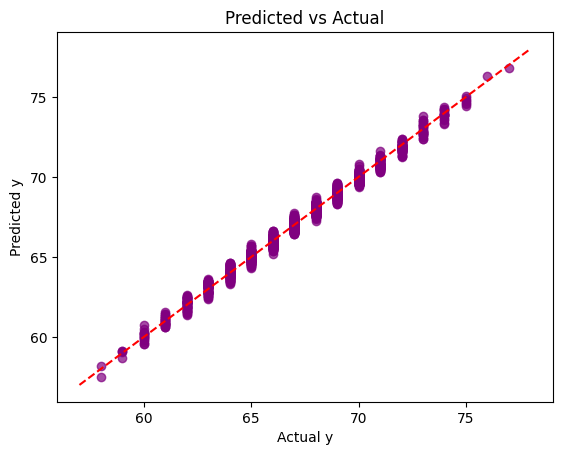

In [107]:
plt.scatter(y_test, y_pred, alpha=0.7, color="purple")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")  # ideal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual")
plt.show()